# Studying Employee Attrition With K-Means

## Looking Into the Model

### Let's first create a new $k$-means model and learn about it's interface. 

In [32]:
from sklearn.cluster import KMeans
import numpy as np

model = KMeans()


### We specify the number of cluster we want to fit by setting an integer value for the parameter n_clusters in the KMeans() method. According to the documenation, n_clusters is the number of clusters to form and the number of centroids to generate.

In [15]:

model.init?


### The model initializes the centroids by default by taking in a string value of 'k-means++' for the parameter init. According to the documentation, k-means++ will select initial clusters in a smart way to speed up convergence. The smart way works as follows: choosing one center randomly from the data points and then measuring the distance between each data point and this center. Then we choose a new data point as a center based on the probability of the distance to the first center. The greater the distance, the higher the probability. Now we measure the distance between each data point to this new center. We keep on doing this until k number of centers have been chosen. It is better than randomly choosing starting centroids because there is a greater likelihood of nearby centers being chosen with random. k-means++, on the other hand, tries to make centers that are away from each other. 


### The model decides that the centroids have converged if the tolerance is greater than the sum of distances between the new centroids and the previous centroids. According to the documentation, max_iter is the Maximum number of iterations of the k-means algorithm for a single run and tol is Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence. If we are dealing with a large dataset, we must increase number of iterations and if we are dealing with a small dataset, we will not be able to reach the default 1x10^-4 tolerance and so we need to use less iterations or change the tolerance value. We need to adjust the tolerance and max_iter based on our input data because we are not aware of how far apart the datapoints are and so the cluster centers will not be correctly positioned and this will then affect the tolerance and the centroids wont fully converge. 


Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## Tackling Employee Attrition


### A real problem that Human Resources (HR) departments in companies across the work would like to address is employee attrition, or turnover. They would like to reduce the number of employees who leave the company as hiring new employees is expensive. In this section, we would like to see if we can make use of $k$-means to identify patterns in employee attrition so that we might suggest which areas an HR department should intervene in.

### To show off their shiny Watson platform, IBM released a (fictional) [sample dataset](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) in 2015 containing employee statistics and whether or not they left the company. We'll use this dataset.

In [16]:
import pandas as pd

data = pd.read_csv('./utility/data/HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', 50)



### With our problem in mind, the next thing to do is to acquire and process our data.


In [17]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [18]:
data.shape

(1470, 35)

In [19]:
numerical_data = data.select_dtypes(include=[np.number])
numerical_data.columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [20]:
categorical_data = data.select_dtypes(exclude=[np.number])
categorical_data.columns.tolist()

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']


The dataset has 1470 examples and 35 features. The 35 features in the dataset are:['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']. 
       
  Of these features, the categorical ones are ['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']
 
 Of these features, the numerical ones are ['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']
 
 The numerical features are discrete and take integer values. The categorical features take string values.



### Now that we have a feel for what data we have, let's do some data wrangling.


### We should remove EmployeeNumber, EmployeeCount because these three features are irrelevant to attrition rates.

In [21]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [22]:
not_interested = ['EmployeeNumber', 'EmployeeCount']
data = data.drop(not_interested, axis=1)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8




### Another step to do in our data processing phase is to replace categorical variables that are represented as strings with an enumeration. For example, `'Attrition'` has `'Yes'` and `'No'` values that we would like to encode as `1` and `0` respectively.


In [23]:
encoded = data.copy()
for i in encoded:
    if encoded.dtypes[i] == "int64":
        continue
    else:
        for j in range(0,np.unique(encoded[i]).size):
            for k in range(0,len(encoded)):
                encoded[i] = encoded[i].replace(to_replace=encoded[i][k], value=j)

assert encoded.shape == data.shape, 'The encoded version of `data` should have the same shape'
assert np.all(encoded.dtypes == 'int64'), 'All values in `encoded` should be integers'



### Now that we have a processed dataset, let's move on to forming clusters with $k$-means. 

### We will need to prepare an $X$ matrix of our dataset. At this point, we will drop the `'Attrition'` column from our dataset. We will also [scale our data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling). 

In [24]:
from sklearn.preprocessing import scale

X = scale(np.float64(encoded.copy().drop('Attrition', axis=1)))

Text(0.5, 1.0, 'Elbow Method to choose k')

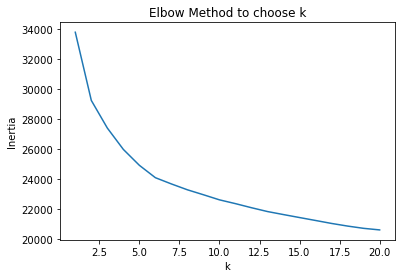

In [27]:
from utility.util_hw import squared_distance
import matplotlib as plt
import matplotlib.pyplot as plt
inertia = []
for k in range(1,21):
    model = KMeans(random_state=11, n_clusters=k).fit(X)
    inertia.append(model.inertia_)
plt.plot(range(1,21), inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title("Elbow Method to choose k")


### When choosing a value of k using the elbow method, there a couple of things that need to be kept in mind. Firstly, points that have a large rate of change between them are in the underfitting region and points that have a small rate of change between them are in the overfitting region. So we have to look for a value of k that stops after the underfitting and stops before the overfitting. This means we are looking for a k that has great rate of change from the previous points but then doesnt have a great rate of change from the points to come (because if the points have a small rate of change that suggests we are experiencing diminishing returns by increasing k). Under this rubric, I would choose 2 as the value of k because it fulfills all the requirements.



### Using the $k$ we selected, we will now create and fit a new model. 

In [28]:

model = KMeans(n_clusters = 2, random_state = 11).fit(X)
centroids = model.cluster_centers_
assignments = model.labels_



### Now that we have cluster assignments from $k$-means, we need to analyze the significance of each cluster. To do that, let's return to our original DataFrame, `data`.

### In the following cell, we add our cluster assignments to `data`. We also compute a pivot table which provides a summary of each cluster.

In [29]:
data['Cluster'] = assignments
pivot = data.pivot_table(index='Cluster', aggfunc=np.mean)

In [30]:

counter0=0
counter1=0
percentages=[]
for i in range(0,data['Cluster'].size):
    if(data['Cluster'][i] == 0):
        counter0+=1
    if(data['Cluster'][i] == 1):
        counter1+=1
percentages.append(counter0/data['Cluster'].size)
percentages.append(counter1/data['Cluster'].size)
for i in range(len(percentages)):
    pivot.loc[i, '% of Attrition'] = percentages[i]*100
    

assert pivot['% of Attrition'].sum() == 100, 'Sum of percentage attrition should be 1'
        




### Let's take a look at the results and identify potential areas for intervention to suggets to the HR department.

In [31]:
pivot.sort_values(by='% of Attrition', axis=0).T

Cluster,0,1
Age,42.759657,34.215139
DailyRate,797.480687,804.808765
DistanceFromHome,9.109442,9.231076
Education,3.079399,2.835657
EnvironmentSatisfaction,2.772532,2.698207
HourlyRate,65.766094,65.949203
JobInvolvement,2.738197,2.726096
JobLevel,3.190987,1.540837
JobSatisfaction,2.751073,2.718127
MonthlyIncome,11133.027897,4353.902390



### There were 2 clusters produced. Cluster 0 had a low rate of attrition and Cluster 1 had a high rate of attrition. The clusters are built on various features such as Age, education, monthly income, % of attrition etc. The two clusters are separated by the % of attrition. There are two things that stand out when it comes attrition rate. Firstly, monthly income is very high for those in cluster 0 (low attrition) compared to those in cluster 1 (high attrition). This can be due to 3 factors. People in cluster 0 (low attrition) tend to be older than people in cluster 1 (high attrition), have been working for more years at the company, and are more educated. This suggests that the more educated you are the more years you work at the company, the higher your income will be. This could mean that people in cluster 1 (high attrition) are just starting out on the job and dissatisfied with their income, leave the company. My advice to HR would be to increase the salaries of junior employees by giving them better base salary or stock options and hire more educated employees since more educated employees have tend to shown lower attrition.